<a href="https://colab.research.google.com/github/Andrei198203/Data_Science_HW_2/blob/main/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Dataset analysis with Kaggle.com

Task1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Downloading data from a CSV file
url = "https://docs.google.com/spreadsheets/d/1LP8ArP3owaGl3bm5Uevr2wHNpRQQHDQRSksIAiED4Lw/export?format=csv"
df = pd.read_csv(url)

Task2

In [4]:
print(df.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


Task3

In [5]:
# Displaying the size of the dataset
print("Dataset size:", df.shape)

Dataset size: (550, 7)


Task4

In [22]:
# Print the number of books in the dataset
print("Number of books in the dataset:", df.shape[0])

Number of books in the dataset: 550


Task5

In [7]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

2. Primary data research

Task6

In [9]:
# Counting the spaces in each column
missing_values = df.isna().sum()
print("Spaces in each column:")
print(missing_values)

# Checking for gaps
if missing_values.sum() > 0:
    print("Do any variables have gaps? Yes")
else:
    print("Do any variables have gaps? No")

Spaces in each column:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Do any variables have gaps? No


Task7

In [11]:
# Unique values in the genre column
unique_genres = df['genre'].unique()
print("Unique genres:")
print(unique_genres)

Unique genres:
['Non Fiction' 'Fiction']


Task8

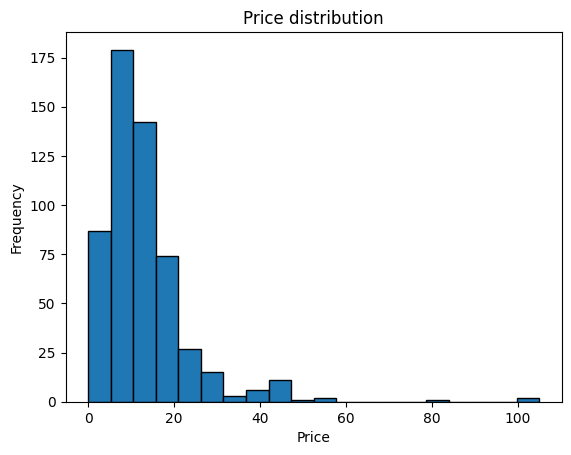

In [23]:
# Building a histogram of price distribution

df['price'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Task9

In [16]:
# Maximum price
max_price = df['price'].max()
print("Maximum price:", max_price)

# Minimum price
min_price = df['price'].min()
print("Minimum price:", min_price)

# Average price
mean_price = df['price'].mean()
print("Average price:", mean_price)

# Median price
median_price = df['price'].median()
print("Median price:", median_price)

Maximum price: 105
Minimum price: 0
Average price: 13.1
Median price: 11.0


3. Search and sort data

Task10

In [18]:
# Finding the highest rating
max_rating = df['user_rating'].max()
print("Highest rating in the dataset:", max_rating)

Highest rating in the dataset: 4.9


Task11

In [20]:
# Number of books with the highest rating
num_books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print("Number of books with the highest rating:", num_books_with_max_rating)

Number of books with the highest rating: 52


Task12

In [25]:
# Find the book with the largest number of reviews
max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print("The book with the most reviews:", max_reviews_book)

The book with the most reviews: Where the Crawdads Sing


Task13

In [27]:
# Creating an interim dataframe for 2015 books
top_2015_books = df[df['year'] == 2015]

# Finding the most expensive book of 2015
max_price_2015 = top_2015_books['price'].max()
max_price_book_2015 = top_2015_books[top_2015_books['price'] == max_price_2015]['name'].values[0]
print("The most expensive book in the Top 50 in 2015:", max_price_book_2015)

The most expensive book in the Top 50 in 2015: Publication Manual of the American Psychological Association, 6th Edition


Task14

In [28]:
# Number of Fiction books in the Top 50 in 2010
num_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print("Number of Fiction books in the Top 50 in 2010:", num_fiction_2010)

Number of Fiction books in the Top 50 in 2010: 20


Task15

In [31]:
# Number of books with a 4.9 rating in 2010 and 2011
num_books_49_rating = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print("Number of books with a 4.9 rating in 2010 and 2011:", num_books_49_rating)

Number of books with a 4.9 rating in 2010 and 2011: 1


Task16

In [33]:
# Filter out books from 2015 with a price of less than 8
filtered_books = df[(df['year'] == 2015) & (df['price'] < 8)]

# Sort books by ascending price
sorted_books = filtered_books.sort_values(by='price')

# Last book in the sorted list
last_book = sorted_books['name'].iloc[-1]
print("Last book in the sorted list:", last_book)

Last book in the sorted list: Old School (Diary of a Wimpy Kid #10)


3. Data aggregation and table joins

Task17

In [36]:
# Group by genre and calculate maximum and minimum prices
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])

# Displaying the result
print("Maximum and minimum prices for each genre:")
print(genre_prices)

Maximum and minimum prices for each genre:
             max  min
genre                
Fiction       82    0
Non Fiction  105    0


Task18

In [38]:
# Group by author and calculate the number of books
author_books_count = df.groupby('author').size().reset_index(name='book_count')

# Table dimensionality
print("Table dimensionality:", author_books_count.shape)

# Author with the largest number of books
author_most_books = author_books_count[author_books_count['book_count'] == author_books_count['book_count'].max()]
print("Author with the largest number of books:", author_most_books['author'].values[0])
print("Number of books by this author:", author_most_books['book_count'].values[0])

Table dimensionality: (248, 2)
Author with the largest number of books: Jeff Kinney
Number of books by this author: 12


Task19

In [40]:
# Group by author and calculate the average rating
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index(name='avg_rating')

# Author with the lowest average rating
min_avg_rating_author = author_avg_rating[author_avg_rating['avg_rating'] == author_avg_rating['avg_rating'].min()]
print("Author with the lowest average rating:", min_avg_rating_author['author'].values[0])
print("The average rating for this author:", min_avg_rating_author['avg_rating'].values[0])

Author with the lowest average rating: Donna Tartt
The average rating for this author: 3.9


Task20

In [43]:
# Join two dataframes
merged_df = pd.concat([author_books_count.set_index('author'), author_avg_rating.set_index('author')], axis=1)

# Sort by increasing number of books and rating
sorted_merged_df = merged_df.sort_values(by=['book_count', 'avg_rating'])

# First author in the list
first_author = sorted_merged_df.index[0]
print("The first author in the list:", first_author)

The first author in the list: Muriel Barbery


Task21

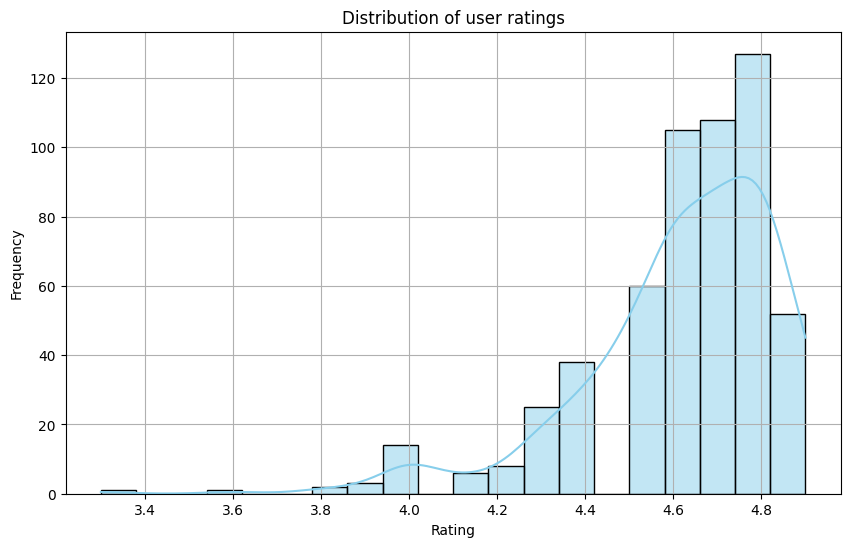

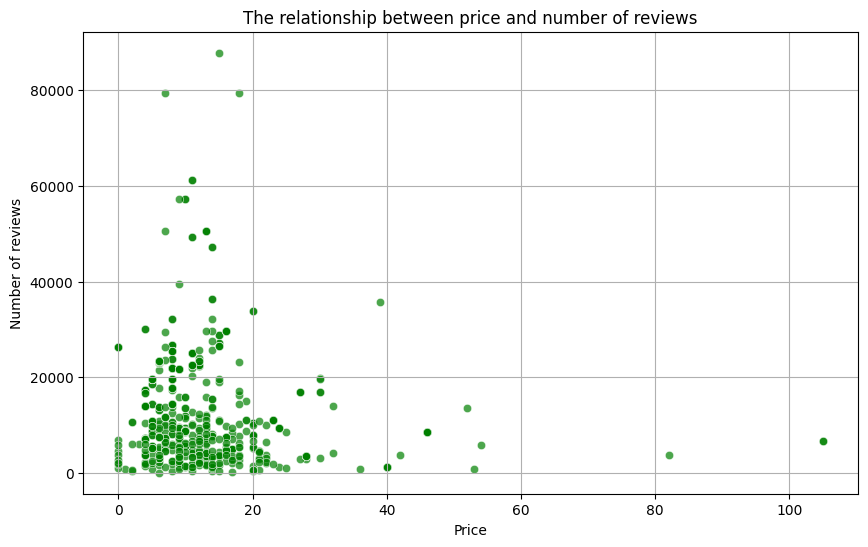

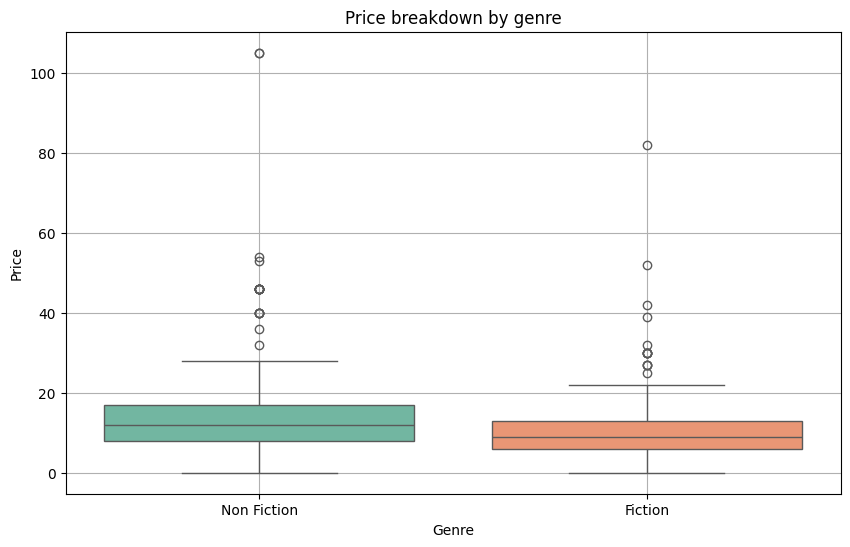

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a directive for Jupyter Notebook
%matplotlib inline

# Building a graph of the distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='user_rating', bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of user ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Building a graph of the relationship between price and number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='reviews', color='green', alpha=0.7)
plt.title('The relationship between price and number of reviews')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.grid(True)
plt.show()

# Building a graph of price distribution by genre
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='genre', y='price', hue='genre', palette='Set2', legend=False)
plt.title('Price breakdown by genre')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.grid(True)
plt.show()